## DSCI 100 007 Group 37

- #####  Preliminary exploratory data analysis

In [1]:
install.packages("psych")

also installing the dependency ‘mnormt’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(tidyverse)
library(ggplot2)
library(psych)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ psych::%+%()      masks ggplot2::%+%()
✖ scales::alpha()   masks psych::alpha(), ggplot

##### Step 1 : read data from url

In [3]:
path <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_disease_data <-read_csv(path)
heart_disease_data

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


##### Step 2 : Naming and filtering data

In [4]:
# Give each column a specific name from given dataset
heart_disease_data <- read_csv(path, col_names = FALSE) |> 
  set_names(c("age", "sex", "cp", "trestbpd", "chol", "fbs", "restecg", "thalach",
              "exang", "oldpeak", "slope", "ca", "thal", "num"))
heart_disease_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbpd,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [5]:
# Now let's add a new column that includes the number of patients.
heart_disease_data <- heart_disease_data |>
  mutate(patient_number = row_number()) |>
  select(patient_number, everything())
heart_disease_data

patient_number,age,sex,cp,trestbpd,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
303,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [38]:
# We will use the select function to keep only the variables trestbps (#5) the  and cholesterol (#6), 
# and num (#14) the predicted heart disease outcome.

filtered_heart_disease_data1 <- heart_disease_data |>
  select(1, 5, 6, 15)
filtered_heart_disease_data1

patient_number,trestbpd,chol,num
<int>,<dbl>,<dbl>,<dbl>
1,145,233,0
2,160,286,2
3,120,229,1
⋮,⋮,⋮,⋮
301,130,131,3
302,130,236,1
303,138,175,0


In [39]:
changed_num1 <- filtered_heart_disease_data1 |>
  mutate(num = ifelse(num >= 1, 1, 0))
# remove all row with '?'
changed_num_11 <- changed_num1 |>
  filter_all(all_vars(. != "?"))
changed_num_11

patient_number,trestbpd,chol,num
<int>,<dbl>,<dbl>,<dbl>
1,145,233,0
2,160,286,1
3,120,229,1
⋮,⋮,⋮,⋮
301,130,131,1
302,130,236,1
303,138,175,0


In [40]:
final_data_with_chol <- changed_num_11
final_data_with_chol <- final_data_with_chol |>
    mutate(num = as_factor(num))
final_data_with_chol

patient_number,trestbpd,chol,num
<int>,<dbl>,<dbl>,<fct>
1,145,233,0
2,160,286,1
3,120,229,1
⋮,⋮,⋮,⋮
301,130,131,1
302,130,236,1
303,138,175,0


In [41]:
set.seed(9999)

heart_disease_split1 <- initial_split(final_data_with_chol, prop = 0.75, strata = num)
heart_disease_train <- training(heart_disease_split1)
heart_disease_test <- testing(heart_disease_split1)
heart_disease_train
heart_disease_test

patient_number,trestbpd,chol,num
<int>,<dbl>,<dbl>,<fct>
1,145,233,0
4,130,250,0
5,130,204,0
⋮,⋮,⋮,⋮
298,140,241,1
299,110,264,1
301,130,131,1


patient_number,trestbpd,chol,num
<int>,<dbl>,<dbl>,<fct>
2,160,286,1
8,120,354,0
9,130,254,1
⋮,⋮,⋮,⋮
300,144,193,1
302,130,236,1
303,138,175,0


In [42]:
describe(heart_disease_train)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
patient_number,1,227,150.63436,86.0285159,153,150.737705,108.2298,1,301,300,-0.03128286,-1.1991285,5.7099131
trestbpd,2,227,131.79736,18.1557517,130,130.546448,14.8260,94,200,106,0.72722291,0.9437541,1.2050396
chol,3,227,246.56388,53.8300268,240,244.049180,50.4084,126,564,438,1.17388445,4.7696730,3.5728244
num*,4,227,1.45815,0.4993466,1,1.448087,0.0000,1,2,1,0.16688152,-1.9808185,0.0331428


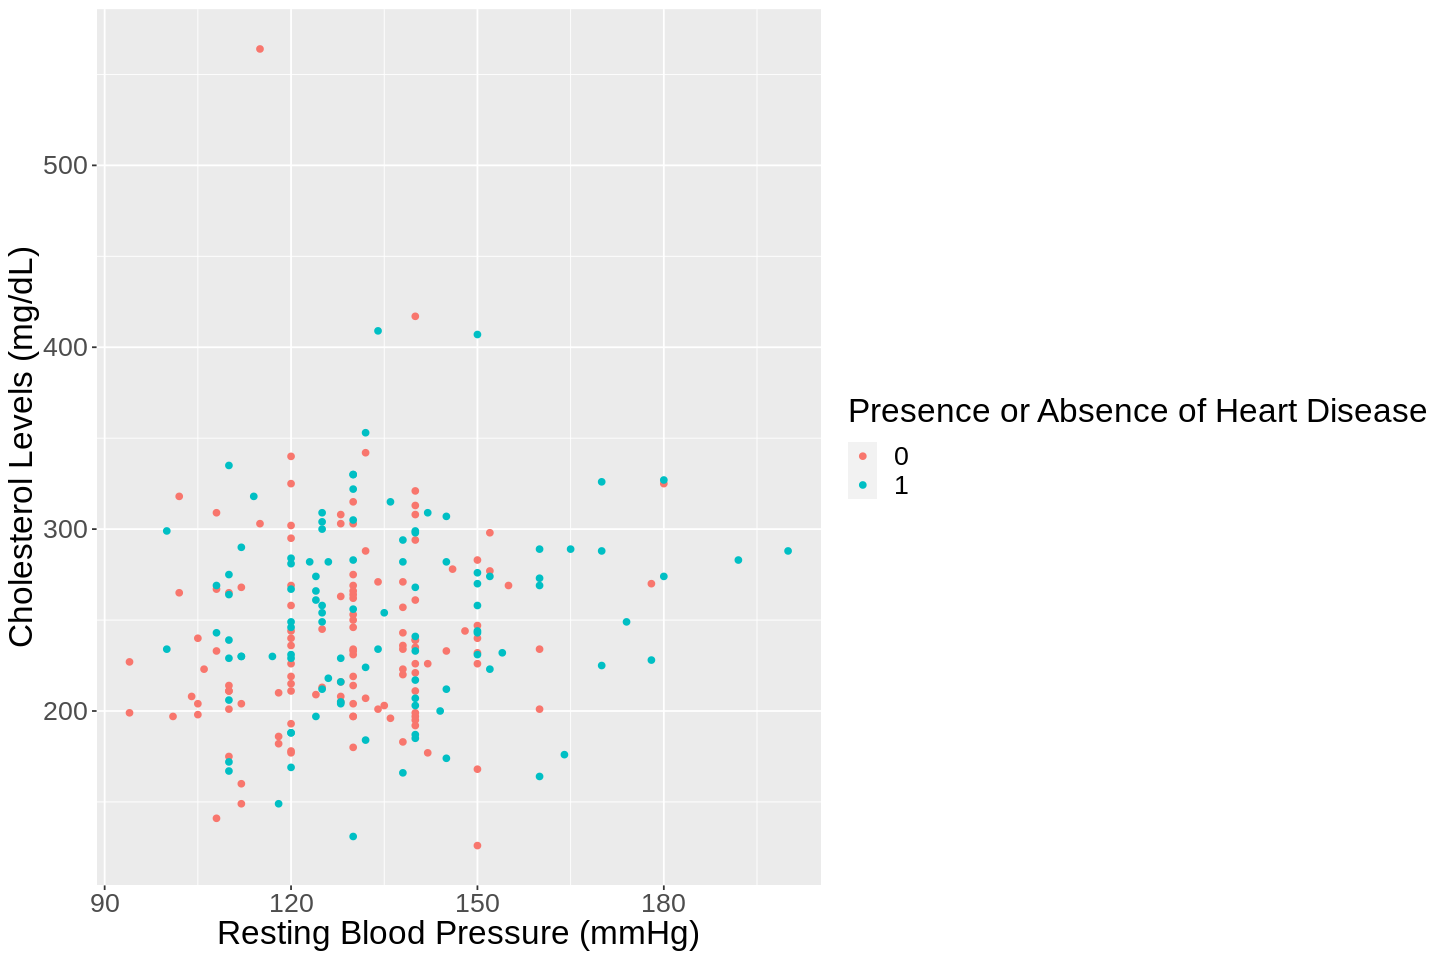

In [44]:
#scatterplot visualising the relationship between cholesterol, resting blood pressure, and heart disease
#1 means presence and 0 means absence of heart disease
options(repr.plot.width = 12, repr.plot.height = 8)
heart_disease_plot <- heart_disease_train |>
    ggplot(aes(x = trestbpd, y = chol, color = num))+
    geom_point() +
    labs(x = "Resting Blood Pressure (mmHg)", y = "Cholesterol Levels (mg/dL)", colour = "Presence or Absence of Heart Disease")+
    theme(text = element_text(size = 20))
heart_disease_plot

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


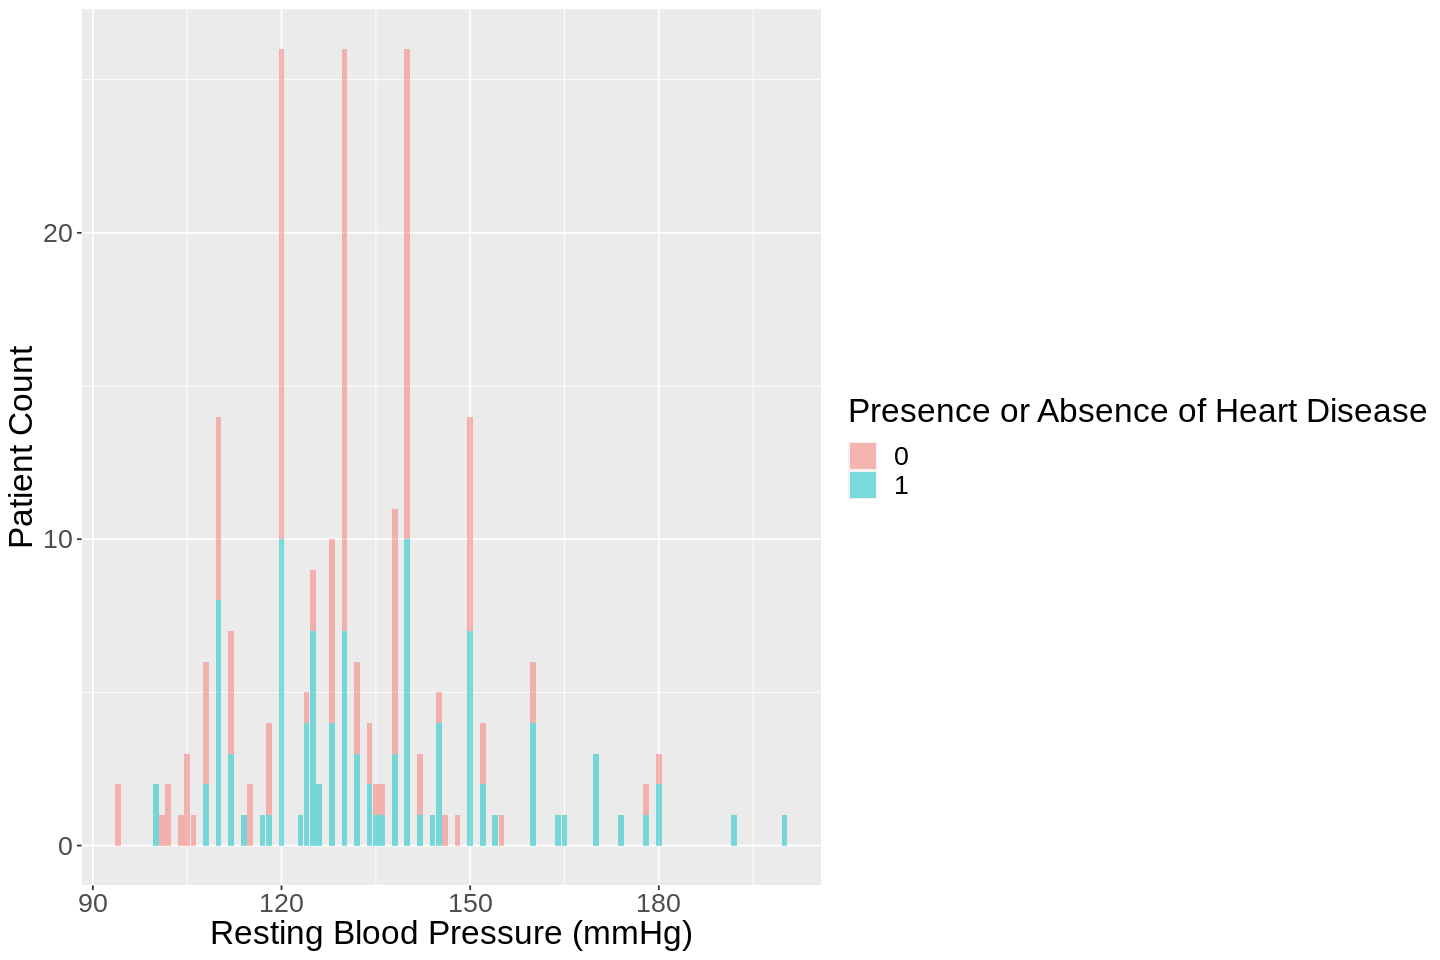

In [29]:
#histogram graph representing whether a patient has heart disease or not categorized based on their resting blood pressure
#1 means presence and 0 means absence of heart disease
options(repr.plot.width = 12, repr.plot.height = 8)
trestbpd_hist1 <- heart_disease_train |>
    ggplot(aes(x = trestbpd, fill = num))+
    geom_histogram(stat = "count", alpha = 0.5) +
    labs(x = "Resting Blood Pressure (mmHg)", y = "Patient Count", fill = "Presence or Absence of Heart Disease")+
    theme(text = element_text(size = 20))
trestbpd_hist1

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


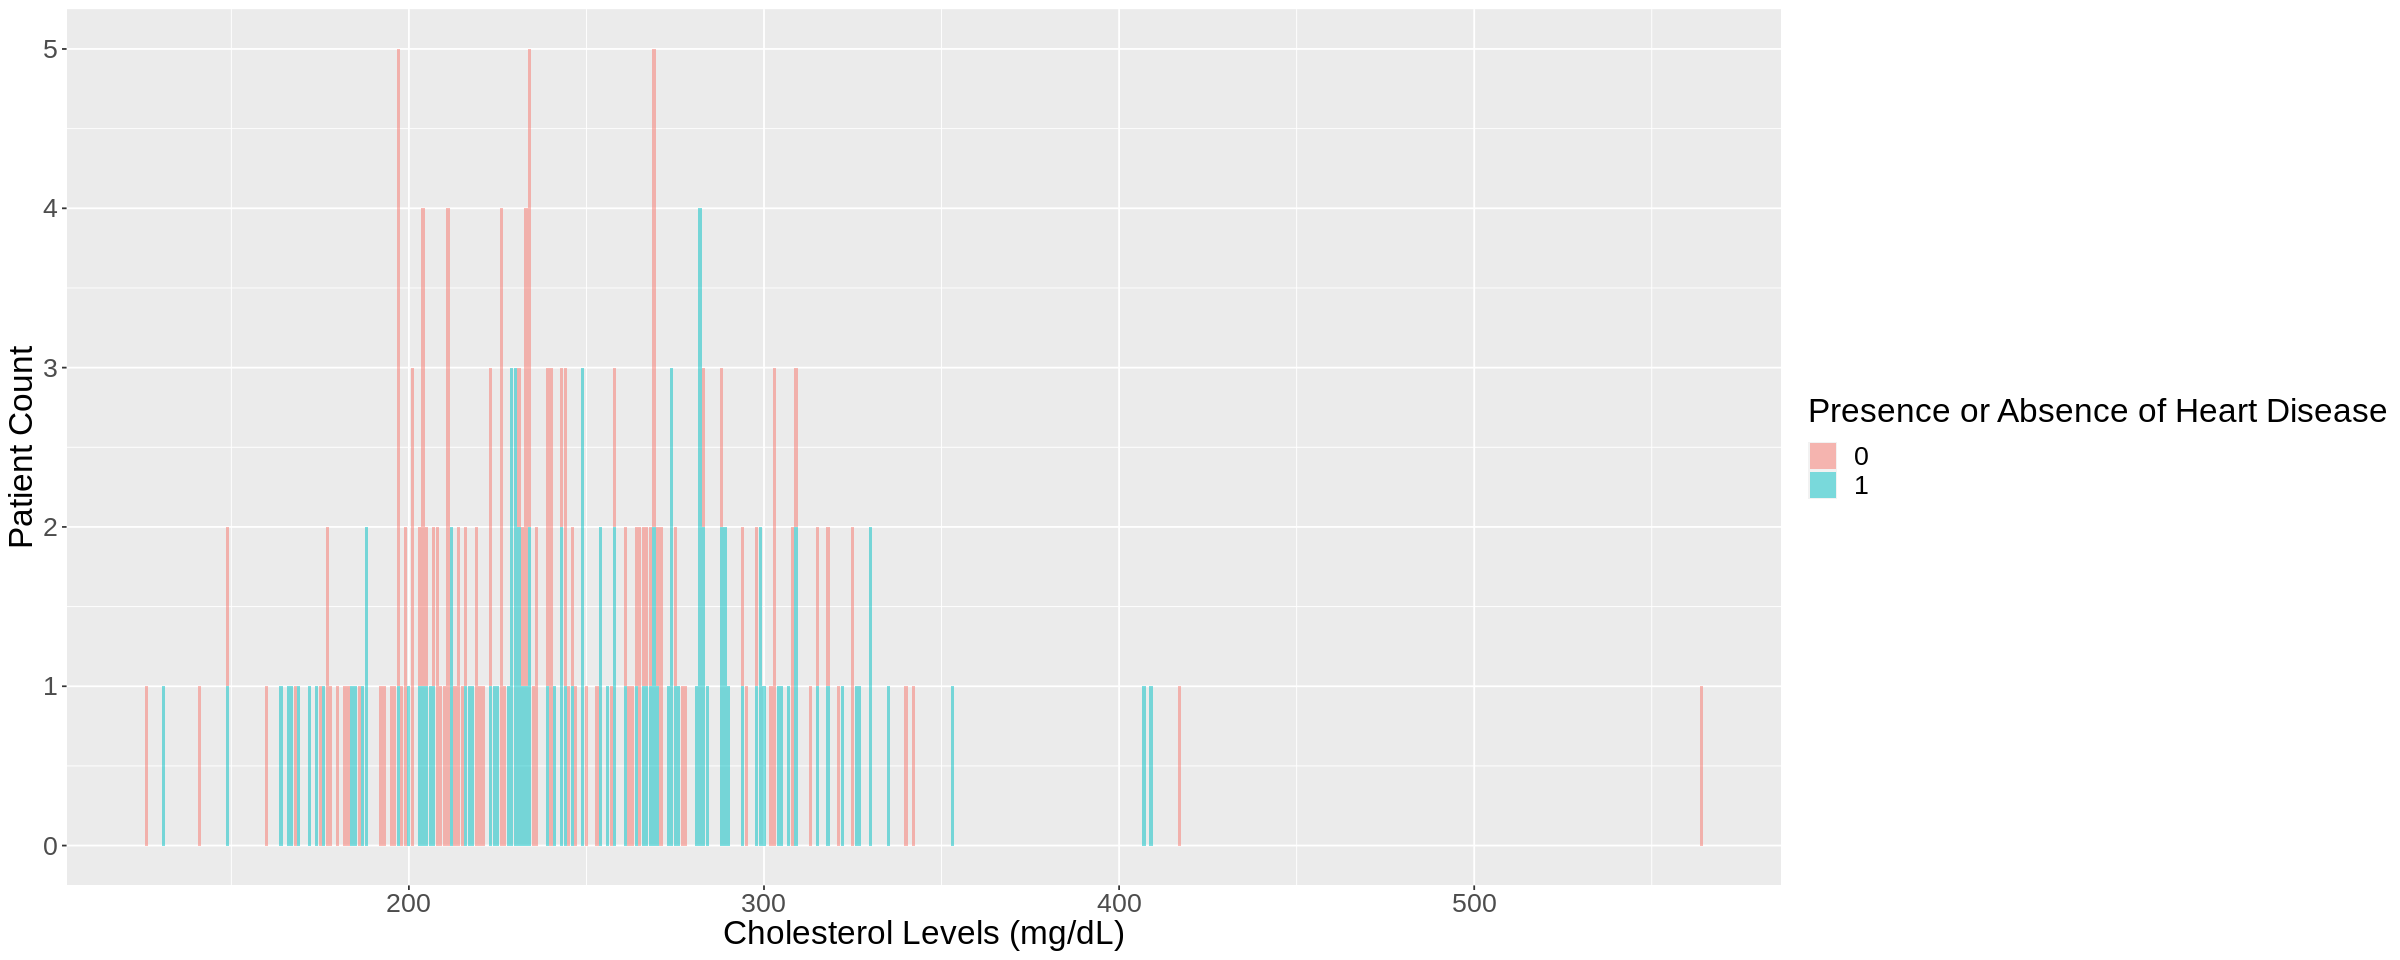

In [45]:
#histogram graph showing patients' cholesterol levels and whether they have heart disease or not 
#1 means presence and 0 means absence of heart disease

options(repr.plot.width = 20, repr.plot.height = 8)

chol_hist <- heart_disease_train |>
    ggplot(aes(x = chol, fill = num))+
    geom_histogram(stat = "count", alpha = 0.5) +
    labs(x = "Cholesterol Levels (mg/dL)", y = "Patient Count", fill = "Presence or Absence of Heart Disease")+
    theme(text = element_text(size = 20))
chol_hist